In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
import pathlib 
import os

### Load Data

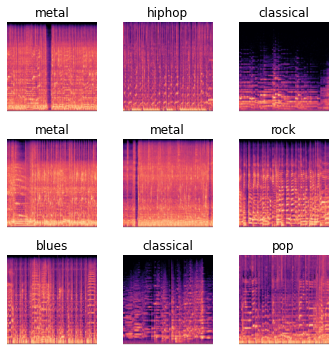

In [10]:
bs = 10
path = pathlib.Path().absolute()/'gdrive/My Drive/'
tfms = get_transforms(do_flip=False, max_rotate=0, max_zoom=0, max_lighting=0, max_warp=0)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=376, bs=bs)
data.show_batch(rows=3, figsize=(5,5))

### Model Training

In [ ]:
model = cnn_learner(data, models.resnet50, metrics=error_rate)

In [12]:
model.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.020379,1.381267,0.457286,00:52
1,1.723182,1.392150,0.386935,00:42
2,1.585528,1.526762,0.472362,00:42
3,1.238217,1.354605,0.422111,00:42
4,1.126739,1.089041,0.341709,00:42
5,0.918273,1.062752,0.341709,00:42
6,0.729872,0.974967,0.301508,00:42
7,0.657516,0.936079,0.271357,00:42
8,0.579891,0.918181,0.261307,00:42
9,0.585041,0.928054,0.286432,00:43


In [ ]:
model.save('stage-1')

### Fine Tuning

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


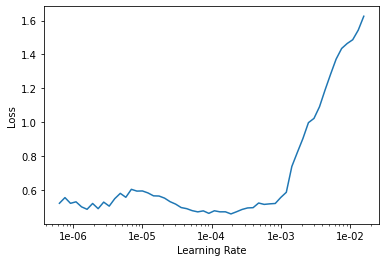

In [35]:
model.load('stage-1')
model.lr_find()
model.recorder.plot()

In [36]:
model.unfreeze()
model.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.537686,0.938791,0.286432,00:56
1,0.454353,0.893374,0.276382,00:56
2,0.554480,0.878497,0.281407,00:56
3,0.450062,0.814119,0.251256,00:56
4,0.388763,0.872844,0.281407,00:56
5,0.360027,0.902220,0.241206,00:56
6,0.297092,0.900651,0.276382,00:56
7,0.245606,0.933187,0.241206,00:56
8,0.230563,0.906618,0.256281,00:56
9,0.255799,0.873550,0.256281,00:56


In [ ]:
model.save('stage-2')

In [40]:
model.load('stage-2')
model.unfreeze()
model.fit_one_cycle(10, max_lr=1e-10)

epoch,train_loss,valid_loss,error_rate,time
0,0.287207,0.846835,0.256281,00:56
1,0.287453,0.901033,0.246231,00:56
2,0.277337,0.886219,0.246231,00:56
3,0.251162,0.909907,0.271357,00:56
4,0.226176,0.863813,0.241206,00:56
5,0.225391,0.932244,0.271357,00:56
6,0.307076,0.921842,0.271357,00:56
7,0.239653,0.882035,0.266332,00:56
8,0.226324,0.885862,0.261307,00:56
9,0.267938,0.881530,0.241206,00:56


In [ ]:
model.save('final_model')

### Results

In [42]:
interp = ClassificationInterpretation.from_learner(model)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

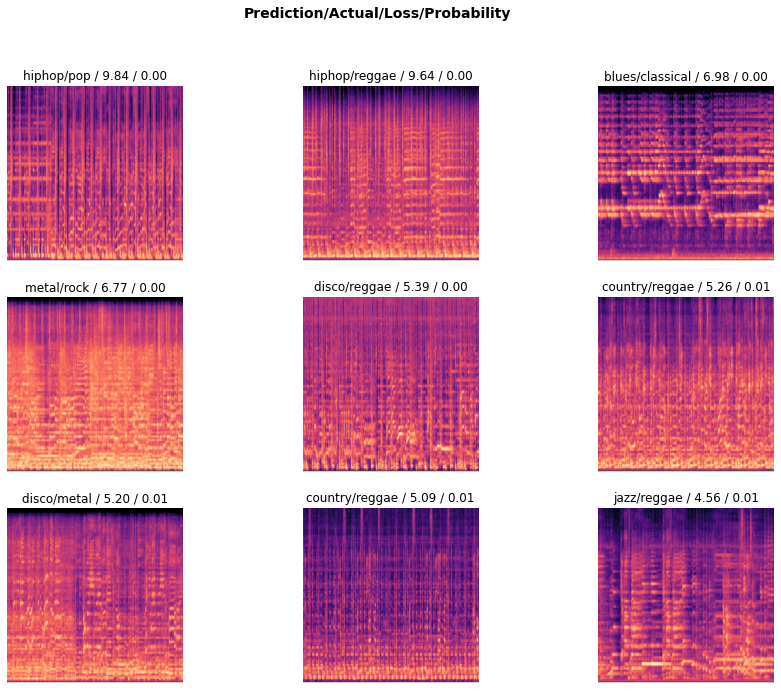

In [43]:
interp.plot_top_losses(9, figsize=(15,11))

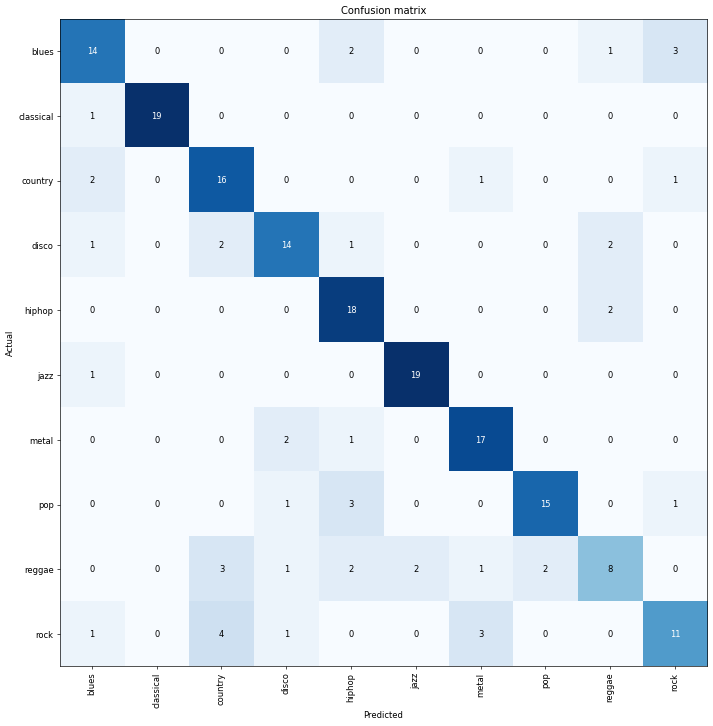

In [44]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)